# 🎯 Objective

Prepare the dataset for analysis and modeling by fixing data-quality issues:

Correct data types

Standardize categories

Encode categorical variables


Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

Load the Dataset

In [2]:
df = pd.read_csv('../data/raw/telco_churn.csv')
print(f"Shape: {df.shape}")
df.head()

Shape: (7043, 21)


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

Handle Data Type Issues

1. TotalCharge feature are numeric but stored as string(obj)

In [3]:
# convert "TotalCharge" to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# confirm conversion
df['TotalCharges'].dtypes

dtype('float64')

Handle Missing Values

In [7]:
missing = df.isnull().sum()
print("Missing Values:\n", missing[missing > 0])

# Fill missing TotalCharge with mediam(Why Median? It’s robust against skewed distributions (like billing amounts).)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

Missing Values:
 Series([], dtype: int64)


C:\Users\lenovo i3\AppData\Local\Temp\ipykernel_17616\1153686574.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


Remove Duplicates

In [12]:
duplicate = df.duplicated().sum()
duplicate

np.int64(0)

There NO repeated customer IDs or accidental duplicates.

Fix Category Inconsistencies

Trim spaces and standardize text to lowercase


In [14]:
df = df.apply(lambda x : x.str.strip().str.lower() if x.dtype == "object" else x)

Encode Target Variable

In [15]:
df['Churn'] = df['Churn'].map({'yes' : 1, 'no' : 0})

Encode Categorical Features

In [ ]:
le = LabelEncoder()
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object']

# Lebel encode binary columns
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encode categorical columns with more than 2 unique values
df = pd.get_dummies(df, drop_first=True)
df.sample(10)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
4884       0              0        1           1      41             1   
4225       1              0        1           0       8             1   
1612       1              0        1           1      67             1   
841        0              0        1           0      72             1   
4518       1              1        0           0       8             1   
5013       1              1        0           0      23             0   
3312       1              0        0           0       1             1   
1406       1              0        0           1      66             1   
3328       0              0        0           0       1             1   
4726       0              0        1           0      72             0   

      PaperlessBilling  MonthlyCharges  TotalCharges  Churn  \
4884                 1           94.90       3848.00      0   
4225                 0           20.25        158.35      0   
1612                 0           87.40       5918.80      1   
841                  1          105.00       7589.80      0   
4518                 1           81.25        585.95      1   
5013                 1           34.65        768.45      0   
3312                 0           20.30         20.30      0   
1406                 1           25.30       1673.80      0   
3328                 1           70.25         70.25      0   
4726                 1           49.20       3580.95      0   

      customerID_0003-mknfe  customerID_0004-tlhlj  customerID_0011-igkff  \
4884                  False                  False                  False   
4225                  False                  False                  False   
1612                  False                  False                  False   
841                   False                  False                  False   
4518                  False                  False                  False   
5013                  False                  False                  False   
3312                  False                  False                  False   
1406                  False                  False                  False   
3328                  False                  False                  False   
4726                  False                  False                  False   

      customerID_0013-exchz  customerID_0013-mhzwf  customerID_0013-smeoe  \
4884                  False                  False                  False   
4225                  False                  False                  False   
1612                  False                  False                  False   
841                   False                  False                  False   
4518                  False                  False                  False   
5013                  False                  False                  False   
3312                  False                  False                  False   
1406                  False                  False                  False   
3328                  False                  False                  False   
4726                  False                  False                  False   

      customerID_0014-bmaqu  customerID_0015-uocoj  customerID_0016-qljis  \
4884                  False                  False                  False   
4225                  False                  False                  False   
1612                  False                  False                  False   
841                   False                  False                  False   
4518                  False                  False                  False   
5013                  False                  False                  False   
3312                  False                  False                  False   
1406                  False                  False                  False   
3328                  False                  False                  False   
4726                  False    

Validate the Cleaned Data

In [20]:
df.info()
df.describe().T.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 7073 entries, gender to PaymentMethod_mailed check
dtypes: bool(7063), float64(2), int64(8)
memory usage: 48.0 MB


count       mean        std  min  25%   50%   75%   max
gender         7043.0   0.504756   0.500013  0.0  0.0   1.0   1.0   1.0
SeniorCitizen  7043.0   0.162147   0.368612  0.0  0.0   0.0   0.0   1.0
Partner        7043.0   0.483033   0.499748  0.0  0.0   0.0   1.0   1.0
Dependents     7043.0   0.299588   0.458110  0.0  0.0   0.0   1.0   1.0
tenure         7043.0  32.371149  24.559481  0.0  9.0  29.0  55.0  72.0

Visual Quick Check

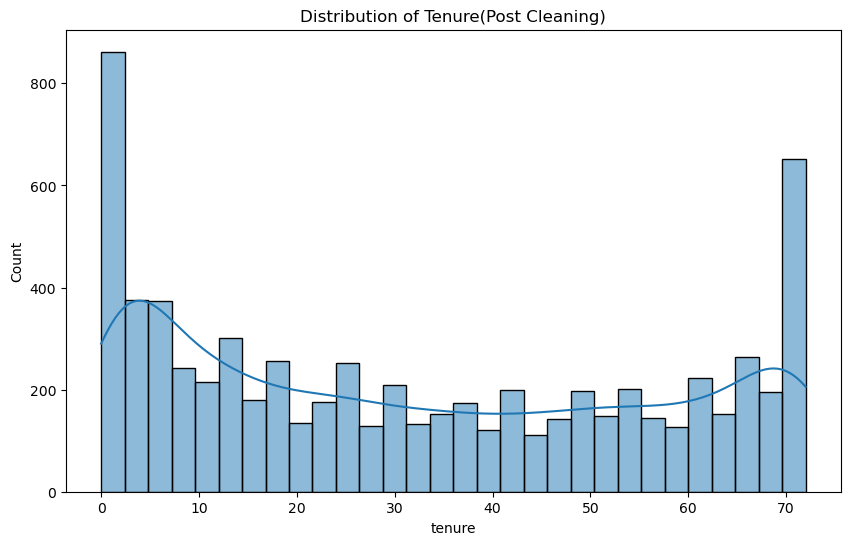

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribution of Tenure(Post Cleaning)')
plt.savefig('../reports/figures/tenure_distribution_cleaned.png', dpi=200, bbox_inches='tight')
plt.show()

Save the Cleaned Dataset

In [ ]:
df.to_csv('../data/processed/telco_churn_cleaned.csv', index=False) 
print("Cleaned data saved to '../data/processed/telco_churn_cleaned.csv'")

### Summary